# Analysis of all mined results

I could create only a "reliable" dataset of hits with both Pfam and Supfam hits, etc. and analyze this one

In [1]:
import pandas as pd

In [29]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../annotation/all_annotation.txt', sep='\t')

C:\Users\terca\AppData\Local\Temp\ipykernel_22388\2204852425.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_annotation.txt', sep='\t')


In [36]:
df_lengths = pd.read_csv('../annotation/all_filtered_5_unique_no_stop_lengths.csv')

In [37]:
df_lengths

,id,length
0,onekp_000000,426
1,onekp_000003,508
2,onekp_000004,309
3,onekp_000006,551
4,onekp_000007,550
...,...,...
606786,bfd_273443,477
606787,bfd_273498,487
606788,bfd_273500,372
606789,bfd_273502,482


In [42]:
df = df_lengths.merge(df, how='left', on='id')

There are `606,791` sequences

In [43]:
df.shape

(606791, 29)

In [44]:
df.columns

Index(['id', 'length', 'architecture_pfam', 'architecture_l_pfam',
       'PF06330.14', 'PF01397.24', 'PF03936.19', 'PF00494.22', 'PF13249.9',
       'PF19086.3', 'PF13243.9', 'architecture_supfam',
       'architecture_l_supfam', '0041184', '0053354', '0053355', '0048261',
       '0048806', '0046340', '0047573', 'record_id', 'record_description',
       'new_id', 'organism', 'tax_id', 'lineage', 'superkingdom', 'kingdom',
       'phylum'],
      dtype='object')

In [3]:
pfam_cols = ['PF01397.24', 'PF03936.19','PF19086.3', 'PF06330.14', 'PF13243.9', 'PF13249.9', 'PF00494.22']

In [4]:
supfam_cols = ['0041184', '0053354', '0053355', '0048261','0048806', '0046340', '0047573']

In [5]:
cols = ['id','superkingdom','kingdom'] + pfam_cols + supfam_cols

## At least one Pfam hit

`103,637` sequences have at least one Pfam hit

In [48]:
df[df[pfam_cols].sum(axis=1)>1].shape[0]

103637

## At least one Supfam hit

`478,058` sequences have at least one Supfam domain

In [49]:
df[df[supfam_cols].sum(axis=1)>1].shape[0]

478058

## Both Pfam and Supfam hit

`71,573` sequences have both at least one Pfam and Supfam domain

In [50]:
df[(df[pfam_cols].sum(axis=1)>1)&(df[supfam_cols].sum(axis=1)>1)].shape[0]

71573

## Pfam domain occurences

**Total**

In [51]:
df[pfam_cols].apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,7.701169,11.734024,13.616715,0.894212,5.7547,5.568804,16.117906


**Only sequences with at least one Pfam hit**

This looks more similar to the results of characterized TPSs

In [52]:
df[df[pfam_cols].sum(axis=1)>1][pfam_cols].apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,44.890338,66.297751,66.588188,4.760848,32.790413,32.274188,0.529734


## Supfam domain occurences

**Total**

In [53]:
df[supfam_cols].apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,7.91228,7.903545,30.339606,20.061932,76.068201,82.986893,73.974894


**Only sequences with at least ine Supfam hit**

In [54]:
df[df[supfam_cols].sum(axis=1)>1][supfam_cols].apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,10.035812,10.031,38.267114,25.341486,96.104029,99.173322,93.49535


## Pfam architectures

**All**

In [55]:
df['architecture_pfam'].value_counts(dropna=False, normalize=True).head(20)

architecture_pfam
NaN                                             0.639126
['PF00494.22']                                  0.124992
['PF01397.24', 'PF03936.19']                    0.053490
['PF19086.3']                                   0.036096
['PF13249.9', 'PF13243.9']                      0.027350
['PF00494.22_partial']                          0.017932
['PF19086.3', 'PF19086.3']                      0.006473
['PF00494.22_partial', 'PF00494.22_partial']    0.005958
['PF01397.24_partial', 'PF03936.19']            0.005837
['PF03936.19']                                  0.005620
['PF13249.9', 'PF13243.9_partial']              0.005076
['PF00494.22_partial', 'PF00494.22']            0.004951
['PF19086.3_partial']                           0.004626
['PF01397.24', 'PF03936.19_partial']            0.004418
['PF13243.9_partial', 'PF13243.9_partial']      0.004328
['PF03936.19_partial']                          0.004000
['PF13249.9_partial', 'PF13243.9']              0.003909
['PF00494.22'

**Only with Pfam architectures**

In [56]:
df['architecture_pfam'].value_counts(dropna=True, normalize=True).head(20)

architecture_pfam
['PF00494.22']                                  0.346359
['PF01397.24', 'PF03936.19']                    0.148222
['PF19086.3']                                   0.100025
['PF13249.9', 'PF13243.9']                      0.075789
['PF00494.22_partial']                          0.049691
['PF19086.3', 'PF19086.3']                      0.017938
['PF00494.22_partial', 'PF00494.22_partial']    0.016509
['PF01397.24_partial', 'PF03936.19']            0.016175
['PF03936.19']                                  0.015573
['PF13249.9', 'PF13243.9_partial']              0.014066
['PF00494.22_partial', 'PF00494.22']            0.013718
['PF19086.3_partial']                           0.012819
['PF01397.24', 'PF03936.19_partial']            0.012243
['PF13243.9_partial', 'PF13243.9_partial']      0.011992
['PF03936.19_partial']                          0.011083
['PF13249.9_partial', 'PF13243.9']              0.010832
['PF00494.22', 'PF00494.22_partial']            0.010590
['PF19086.3',

## Supfam architectures

**All**

In [57]:
df['architecture_supfam'].value_counts(dropna=False, normalize=True).head(20)

architecture_supfam
['0046340']                               0.664314
NaN                                       0.153999
['0048261']                               0.033722
['0053355']                               0.024776
['0048806']                               0.021157
['0047573']                               0.018769
['0046340_partial', '0046340_partial']    0.005755
['0041184', '0048261']                    0.005518
['0041184', '0053355']                    0.005391
['0048806_partial', '0046340']            0.004712
['0046340_partial']                       0.004471
['0046340_partial', '0046340']            0.004110
['0047573', '0047573']                    0.003937
['0047573_partial']                       0.003555
['0047573_partial', '0046340']            0.002924
['0046340', '0046340_partial']            0.002217
['0053355_partial']                       0.002187
['0046340', '0047573_partial']            0.002169
['0048806_partial']                       0.002133
['0046340',

**Only with Supfam architecture**

In [58]:
df['architecture_supfam'].value_counts(dropna=True, normalize=True).head(20)

architecture_supfam
['0046340']                               0.785240
['0048261']                               0.039860
['0053355']                               0.029286
['0048806']                               0.025008
['0047573']                               0.022186
['0046340_partial', '0046340_partial']    0.006802
['0041184', '0048261']                    0.006522
['0041184', '0053355']                    0.006372
['0048806_partial', '0046340']            0.005569
['0046340_partial']                       0.005285
['0046340_partial', '0046340']            0.004858
['0047573', '0047573']                    0.004654
['0047573_partial']                       0.004202
['0047573_partial', '0046340']            0.003456
['0046340', '0046340_partial']            0.002620
['0053355_partial']                       0.002585
['0046340', '0047573_partial']            0.002564
['0048806_partial']                       0.002521
['0046340', '0048806_partial']            0.002460
['0047573',

## Taxonomy

In [62]:
df['superkingdom'].value_counts(dropna=False)

superkingdom
Metagenome    296458
Bacteria      157086
Eukaryota     113052
unknown        34250
Archaea         5649
undef            212
Viruses           84
Name: count, dtype: int64

In [65]:
df[df['superkingdom']=='Viruses']['kingdom'].value_counts()

kingdom
unknown           41
Pararnavirae      16
Orthornavirae     11
Heunggongvirae     7
Bamfordvirae       6
Shotokuvirae       3
Name: count, dtype: int64

## Length analysis
- in Rstudio

<Axes: ylabel='Frequency'>

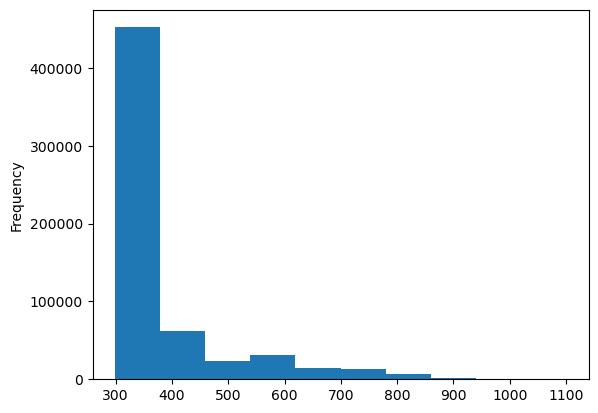

In [60]:
df['length'].plot.hist()

In [67]:
df.to_csv('../annotation/all_filtered_5_annotation.csv', index=False)

# Pfam domains

In [2]:
df = pd.read_csv('../annotation/all_filtered_5_annotation.csv')

## Eukaryotes

In [9]:
df[df['superkingdom']=='Eukaryota'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,40.113399,48.843895,52.052153,1.96989,8.275838,7.837986,7.259491


## Plants

In [10]:
df[df['kingdom']=='Viridiplantae'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,63.290626,69.033765,65.714605,0.211207,8.266428,7.553081,6.481663


## Fungi

In [11]:
df[df['kingdom']=='Fungi'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.09428,30.213702,54.010057,12.727844,4.211188,4.324324,9.861722


## Metazoa

In [12]:
df[df['kingdom']=='Metazoa'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.394602,3.960637,12.768549,0.199737,12.037804,11.989088,3.205534


## Other

In [13]:
df[(df['superkingdom']=='Eukaryota') & (df['kingdom']=='unknown')][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.07811,4.764694,12.692833,0.195274,5.955868,6.09256,26.283929


## Bacteria

In [14]:
df[df['superkingdom']=='Bacteria'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.023554,7.020358,10.762894,1.75318,5.297735,5.200973,16.642476


## Archaea

In [15]:
df[df['superkingdom']=='Archaea'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.053107,3.575854,5.257568,0.0,2.389804,2.336697,28.305895


## Metagenome

In [16]:
df[df['superkingdom']=='Metagenome'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.202052,1.178244,1.684556,0.114013,5.0169,4.896478,18.741272


## Viruses

In [17]:
df[df['superkingdom']=='Viruses'][pfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,PF01397.24,PF03936.19,PF19086.3,PF06330.14,PF13243.9,PF13249.9,PF00494.22
1.0,0.0,0.0,1.190476,0.0,8.333333,8.333333,20.238095


# Supfam domains

## Eukaryotes

In [18]:
df[df['superkingdom']=='Eukaryota'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,41.163358,41.166897,59.673425,58.846372,84.030358,86.987404,79.739412


## Plants

In [20]:
df[df['kingdom']=='Viridiplantae'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,64.943911,64.949506,69.324699,69.068733,84.637872,88.30811,84.330154


## Fungi

In [21]:
df[df['kingdom']=='Fungi'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.119422,0.100566,68.786926,68.026398,86.191075,87.089881,79.987429


## Metazoa

In [22]:
df[df['kingdom']=='Metazoa'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.399474,0.414089,28.6793,25.834267,84.15258,85.672529,69.605885


## Other

In [23]:
df[(df['superkingdom']=='Eukaryota') & (df['kingdom']=='unknown')][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.07811,0.07811,20.855302,19.937512,68.346026,73.501269,55.496973


## Bacteria

In [24]:
df[df['superkingdom']=='Bacteria'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.036922,0.02801,27.700113,15.683766,75.961575,83.809506,74.193117


## Archaea

In [25]:
df[df['superkingdom']=='Archaea'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.070809,0.053107,26.270136,13.54222,71.924234,76.650735,70.401841


## Metagenome

In [26]:
df[df['superkingdom']=='Metagenome'][supfam_cols].fillna(0).apply(lambda x: x.value_counts(normalize=True, dropna=False) * 100).fillna(0).loc[[1.0]]

,0041184,0053354,0053355,0048261,0048806,0046340,0047573
1.0,0.215545,0.202727,21.907994,8.981036,73.750751,81.469213,72.33706


## Viruses